# Periodicity Analysis

To identify whether there is significant periodicity in the 2022 Haiti Cholera dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import periodic_sampling as ps
from periodic_sampling.analysis import fourier_transform, plot_fft, weekday_t_tests
from periodic_sampling.analysis import kruskal_weekday_test, multiple_comparisons_correction

In [3]:
# Read in data

df = pd.read_csv("haiti_cholera.csv")
df.index = df.index.sort_values()
df["Date"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y")
print(df.head())

        Date  Cases
0 2022-09-29      1
1 2022-09-30      3
2 2022-10-01      4
3 2022-10-02     15
4 2022-10-03     31


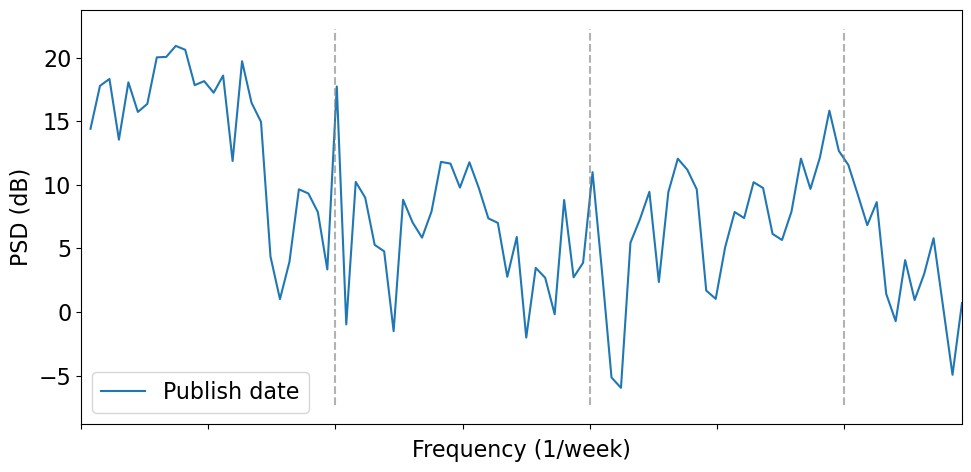

In [6]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(1, 1, figsize=(10,5))

df["Days"] = df.index
df = ps.analysis.rel_reporting_calc(df, ['Cases'])

case_fft_pub, case_freq_pub = fourier_transform(df, column='Dif_Cases', compute_psd=True)
plot_fft(case_fft_pub, case_freq_pub, ax=ax, color='tab:blue', label="Publish date", linewidth = 1.5)
ax.set_xticklabels([])


fig.patch.set_facecolor('white'); fig.tight_layout()
# plt.savefig(f"../images/uk_phe_data/daily_fft_cases_deaths.png")


## Weekly Patterns
We can identify periodic, weekly variation in the observed reporting factor.

In [7]:
summary = df.groupby('Weekday').median().sort_values('Day_Index')
print(summary[['Dif_Cases']])

           Dif_Cases
Weekday             
Monday      0.903108
Tuesday     1.041730
Wednesday   1.039475
Thursday    1.059873
Friday      0.976934
Saturday    0.974468
Sunday      0.894510


In [8]:
def _my_print(list, print_output = True):
    output = [float('%.2g' % x) for x in list]
    return output if not print_output else print(output)

def print_weekday_tests(df, col):
    print("Test results for column: " + col)
    print("  T-test stat: " + str(_my_print(weekday_t_tests(df, col, p_vals = False), print_output=False)))
    print("  p values:    " + str(_my_print(weekday_t_tests(df, col, p_vals = True), print_output=False)))
    print("  Accept H0:   " + str(multiple_comparisons_correction(weekday_t_tests(df, col), 0.01)))

print_weekday_tests(df, 'Dif_Cases')

Test results for column: Dif_Cases
  T-test stat: [-1.1, 1.6, 1.7, 1.7, 0.57, 0.42, -5.1]
  p values:    [0.28, 0.12, 0.095, 0.097, 0.58, 0.68, 2.8e-05]
  Accept H0:   [True, True, True, True, True, True, False]


In [9]:
print(kruskal_weekday_test(df, 'Dif_Cases'))

KruskalResult(statistic=28.380444271995316, pvalue=7.966016004632459e-05)
